# WeatherPy
----

### Analysis
* Weather data was taken just ten days after the winter solstice, so the temperature data for the southern hemisphere is similar to that at the equator, although the southernmost cities are somewhat cooler.  The northern hemisphere is significantly colder, and the coldest cities have maximum temperatures colder than -40 degrees Fahrenheit, despite the northernmost cities having temperatures closer to 0 degrees Fahrenheit.  To properly compare the southern and northern hemispheres, temperature data should be taken closer to an equinox or throughout the year.
* The cities data contains significantly more cities in the northern hemisphere that are more than 40 degrees from the equator, and the southern hemisphere data contains no cities that are more than 60 degrees from the equator.  Also, the method used to retrieve random cities favors remote cities, especially in coastal or island areas.
* There is no strong relationship between latitude and humidity.  However, there are a few cities in the northern hemisphere with 0% humidity, possibly due to a lack of data.  One city has ridiculously high humidity (nearly 300%), probably due to a data entry error.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 20, 40, 75, and 90% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in both hemispheres there are a few cities with wind speeds over 30 mph, and all of these cities are at least 40 degrees from the equator.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print("Beginning Data Retrieval")
print("-----------------------------")

# initialize lists for DataFrame columns
names = []
cloudiness = []
countries = []
dates = []
humidity = []
latitudes = []
longitudes = []
max_temps = []
wind_speeds = []

# loop through cities and append data to lists
for x in range(len(cities)):
    print(f"Processing Record {x} | {cities[x]}")
    target_url = ('http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={0}&q={1}').format(api_key, cities[x])
    try:
        response = requests.get(target_url).json()
        names.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
    except:
        # If city not found, display a message
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

# Create the DataFrame from the list data
cities_df = pd.DataFrame( {
    "City": names,
    "Cloudiness": cloudiness,
    "Country": countries,
    "Date": dates,
    "Humidity": humidity,
    "Lat": latitudes,
    "Lng": longitudes,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
    } )

Beginning Data Retrieval
-----------------------------
Processing Record 0 | tura
Processing Record 1 | belaya gora
Processing Record 2 | hithadhoo
Processing Record 3 | tessalit
Processing Record 4 | arraial do cabo
Processing Record 5 | taolanaro
City not found. Skipping...
Processing Record 6 | qandala
Processing Record 7 | nioro
Processing Record 8 | albany
Processing Record 9 | rikitea
Processing Record 10 | busselton
Processing Record 11 | raesfeld
Processing Record 12 | vaini
Processing Record 13 | bengkulu
City not found. Skipping...
Processing Record 14 | vaitupu
City not found. Skipping...
Processing Record 15 | lavrentiya
Processing Record 16 | talnakh
Processing Record 17 | bonthe
Processing Record 18 | port alfred
Processing Record 19 | butaritari
Processing Record 20 | karamay
City not found. Skipping...
Processing Record 21 | marsa matruh
Processing Record 22 | hilo
Processing Record 23 | noumea
Processing Record 24 | christchurch
Processing Record 25 | labuhan
Processin

Processing Record 228 | chaman
Processing Record 229 | vardo
Processing Record 230 | yulara
Processing Record 231 | quebo
City not found. Skipping...
Processing Record 232 | tasiilaq
Processing Record 233 | roald
Processing Record 234 | svay rieng
Processing Record 235 | hamilton
Processing Record 236 | walvis bay
Processing Record 237 | warqla
City not found. Skipping...
Processing Record 238 | yazman
Processing Record 239 | heishan
Processing Record 240 | kutum
Processing Record 241 | cidreira
Processing Record 242 | wajir
Processing Record 243 | ibra
Processing Record 244 | te anau
Processing Record 245 | ahvaz
Processing Record 246 | chokurdakh
Processing Record 247 | marsabit
Processing Record 248 | pringsewu
Processing Record 249 | krasnyye chetai
Processing Record 250 | araouane
Processing Record 251 | langfang
Processing Record 252 | faya
Processing Record 253 | mbini
Processing Record 254 | itamarandiba
Processing Record 255 | sokoni
Processing Record 256 | tabiauea
City not f

Processing Record 457 | ampanihy
Processing Record 458 | nuevo ideal
Processing Record 459 | murray bridge
Processing Record 460 | abonnema
Processing Record 461 | tondano
Processing Record 462 | tual
Processing Record 463 | severo-yeniseyskiy
Processing Record 464 | saint anthony
Processing Record 465 | lahij
Processing Record 466 | kawana waters
City not found. Skipping...
Processing Record 467 | johi
Processing Record 468 | sorong
Processing Record 469 | khuzdar
Processing Record 470 | alappuzha
City not found. Skipping...
Processing Record 471 | vila
Processing Record 472 | katsuura
Processing Record 473 | dzilam gonzalez
Processing Record 474 | tiksi
Processing Record 475 | ilulissat
Processing Record 476 | rio grande
Processing Record 477 | san andres
Processing Record 478 | eldikan
City not found. Skipping...
Processing Record 479 | xiongyue
Processing Record 480 | portland
Processing Record 481 | fianga
City not found. Skipping...
Processing Record 482 | arenzano
Processing Rec


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df.to_csv(output_data_file,encoding="utf-8", index=False)
cities_df.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

In [5]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tura,0,IN,1546298487,79,25.52,90.21,45.41,3.06
1,Belaya Gora,76,RU,1546298487,70,68.54,146.19,-10.17,10.45
2,Hithadhoo,88,MV,1546298277,100,-0.60,73.08,82.89,9.78
3,Tessalit,56,ML,1546298488,29,20.20,1.01,52.20,5.53
4,Arraial do Cabo,12,BR,1546298488,88,-22.97,-42.02,79.79,16.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

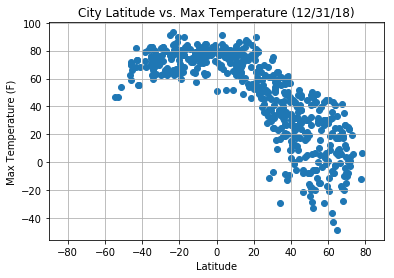

In [6]:
# Calculate the current date
today = time.strftime("%m/%d/%y")

plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (" + today + ")")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-90, 90)
plt.grid(True)

# Save the figure
plt.savefig("output_data/MaxTemperatureByLatitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

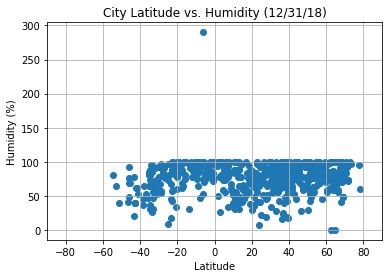

In [7]:
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (" + today + ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-90, 90)
plt.grid(True)

# Save the figure
plt.savefig("output_data/HumidityByLatitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

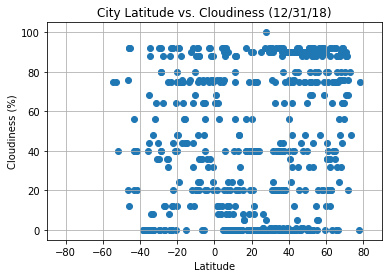

In [8]:
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (" + today + ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(-90, 90)
plt.ylim(-5, 105)
plt.grid(True)

# Save the figure
plt.savefig("output_data/CloudinessByLatitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

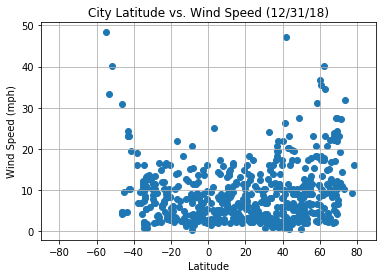

In [9]:
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (" + today + ")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-90, 90)
plt.grid(True)

# Save the figure
plt.savefig("output_data/WindSpeedByLatitude.png")

# Show plot
plt.show()